In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Edu-Data.csv")
encode = LabelEncoder()

In [3]:
#dataset for my project
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# Vistualizing Dataset by plotting Correlation Matrix
# So as we can see that correlation between these catagorical points are lying between range of 0.34 to 0.69 which is quite okay to deal with it, if it was near to .80 or .90 then we have to discard one of the feature from our dataset inorder to prevent overfitting 


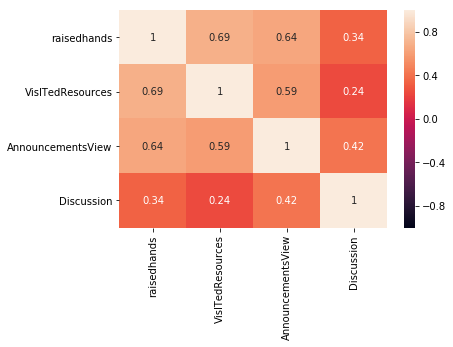

In [4]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True)

In [5]:
data.drop('GradeID',inplace=True,axis=1)

In [6]:
data.drop('Relation',inplace=True,axis=1)

In [7]:
data.drop('SectionID',inplace=True,axis=1)

In [8]:
#Target classes
y = data['Class']
y1=data['StageID']
y2=data['StudentAbsenceDays']
y3 = data['Topic']

# These are the three classes upon which i can do classification on the basis of its distribution. 

In [9]:
Y = encode.fit_transform(y)
Y_StageID = encode.fit_transform(y1)
Y_StudentAbsenceDays = encode.fit_transform(y2)
Y_Topic = encode.fit_transform(y3)

# For Predicting interest of any student I have used column named Topic to predict the interest of any student.

# In above tab I have converted the Topic columns in to numeric value

# {'Arabic','Biology','Chemistry','English','French','Geology','History','IT','Math','Quran'        
 # ,'Science','Spanish'}
 
 # After convertion the column value look like this - &gt; {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


# Here I have shown the actual and converted value that I have used for prediction purpose

In [10]:
show = pd.DataFrame()
show[' Topic'] = list(set(y3))
show['converted_value'] = list(set(Y_Topic))

In [11]:
show.head()

,Topic,converted_value
0,History,0
1,Geology,1
2,IT,2
3,Arabic,3
4,Quran,4


# Distribution of my one of the targeted class here Label 0: low level student , Label 1: Medium Level, Label 2 : high level student

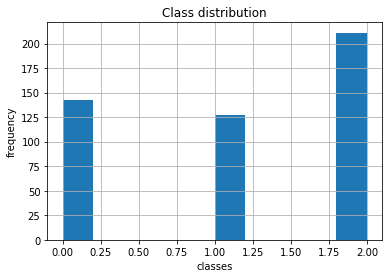

In [12]:
plt.hist(Y)
plt.title("Class distribution")
plt.xlabel("classes")
plt.ylabel("frequency")
plt.grid()
plt.show()

# Different student belonging to different level of school i.e low level , Middle school and high school

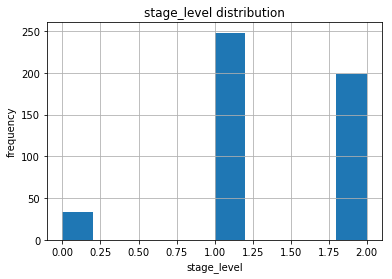

In [13]:
plt.hist(Y_StageID)
plt.title("stage_level distribution")
plt.xlabel("stage_level")
plt.ylabel("frequency")
plt.grid()
plt.show()

# Vistualizing the data which is related to level of performance of students here : Label 0:Under-7 days and Label 1 : Above-7 days

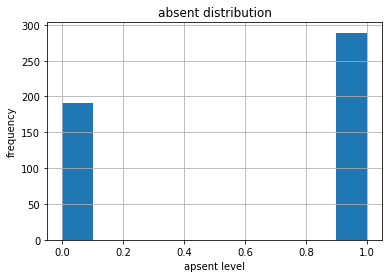

In [14]:
plt.hist(Y_StudentAbsenceDays)
plt.title("absent distribution")
plt.xlabel("apsent level")
plt.ylabel("frequency")
plt.grid()
plt.show()

# Below I have merged two column for prediction of student performance level and interest of subject

# In this way I can predict both the columns in one shot

In [15]:
target_column = pd.DataFrame()
target_column['student_level'] = Y
target_column['interest_subject'] = Y_Topic

In [16]:
target_column.head()

,student_level,interest_subject
0,2,7
1,2,7
2,1,7
3,1,7
4,2,7


In [17]:
X = data.iloc[:,0:13]

In [18]:
X['gender']=encode.fit_transform(X['gender'])
X['NationalITy']=encode.fit_transform(X['NationalITy'])
X['PlaceofBirth']=encode.fit_transform(X['PlaceofBirth'])
X['StageID']=encode.fit_transform(X['StageID'])
X['Topic']=encode.fit_transform(X['Topic'])
X['Semester']=encode.fit_transform(X['Semester'])
X['ParentAnsweringSurvey']=encode.fit_transform(X['ParentAnsweringSurvey'])
X['ParentschoolSatisfaction']=encode.fit_transform(X['ParentschoolSatisfaction'])
X['StudentAbsenceDays']=encode.fit_transform(X['StudentAbsenceDays'])

In [19]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,balanced_accuracy_score
from sklearn.multioutput import MultiOutputClassifier

In [20]:
xtrain,xtest,ytrain,ytest = tts(X,target_column,test_size=0.2,random_state=0)

In [21]:
xtrain.shape,ytrain.shape

((384, 13), (384, 2))

# Ensembling technique is used to develop this model and i have used target as feature name class for training of model

# Here targets are the level of academic i.e. Low, Medium, High and Subjects so that model can predict the both

In [22]:
esm=[]

In [23]:
#esm.append(('svc',SVC(gamma='auto')))
esm.append(('rfc',RandomForestClassifier(n_estimators=100)))
esm.append(('ext',ExtraTreesClassifier(n_estimators=100)))
#esm.append(('dtc',DecisionTreeClassifier()))

In [24]:
clf = MultiOutputClassifier(VotingClassifier(esm,voting='hard',weights=[1440,1820]))

# In below tab I have fitted or can say trained model for classification 

In [25]:
clf.fit(xtrain,ytrain) #classifier for model

MultiOutputClassifier(estimator=VotingClassifier(estimators=[('rfc',
                                                              RandomForestClassifier(bootstrap=True,
                                                                                     ccp_alpha=0.0,
                                                                                     class_weight=None,
                                                                                     criterion='gini',
                                                                                     max_depth=None,
                                                                                     max_features='auto',
                                                                                     max_leaf_nodes=None,
                                                                                     max_samples=None,
                                                                                     min_impurity_decrease=

In [26]:
clf.score(xtrain,ytrain) ###### from hera we can see that model have score 100 which is max in training.

1.0

# Here in below tab I have done prediction on unseen data to check the robustness of my model

In [27]:
pred = clf.predict(xtest)

In [28]:
pred = pd.DataFrame(pred)

In [29]:
pred.head()

,0,1
0,2,7
1,1,7
2,1,10
3,2,10
4,0,4


In [30]:
predicted_performance = pred[0]
predicted_interest = pred[1]

In [31]:
len(predicted_performance)

96

In [32]:
test_performance= ytest['student_level']
test_interest= ytest['interest_subject']   

# Here in below tab I have used balance accuracy to evaluate the accuracy of model whether it had performed well or not 

# From the calculated score I can say that model had performed well

In [33]:
print(balanced_accuracy_score(test_performance,predicted_performance))

0.8619047619047618


In [34]:
print(balanced_accuracy_score(test_interest,predicted_interest))

0.8899976657329599


In [35]:
print(classification_report(test_performance,predicted_performance))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.92      1.00      0.96        23
           2       0.86      0.80      0.83        45

    accuracy                           0.84        96
   macro avg       0.85      0.86      0.85        96
weighted avg       0.84      0.84      0.84        96



In [36]:
print(classification_report(test_interest,predicted_interest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4
           4       0.94      1.00      0.97        16
           5       1.00      1.00      1.00         7
           6       0.75      1.00      0.86         3
           7       0.88      0.88      0.88        17
           8       1.00      0.71      0.83         7
           9       0.67      0.33      0.44         6
          10       0.73      1.00      0.85        11
          11       1.00      1.00      1.00         4

    accuracy                           0.91        96
   macro avg       0.91      0.89      0.89        96
weighted avg       0.91      0.91      0.90        96



# Plots of predicted_interest and predicted_performence 

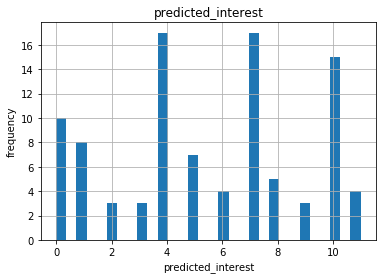

In [37]:
plt.hist(predicted_interest,bins=30)
plt.title('predicted_interest')
plt.xlabel('predicted_interest')
plt.ylabel('frequency')
plt.grid()
plt.show()

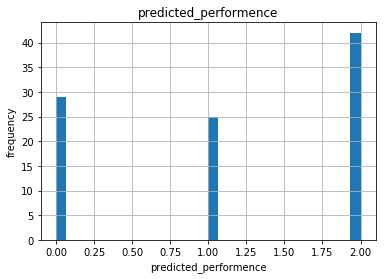

In [38]:
plt.hist(predicted_performance,bins=30)
plt.title('predicted_performence')
plt.xlabel('predicted_performence')
plt.ylabel('frequency')
plt.grid()
plt.show()

In [39]:
####model prepared###